### 목표
 - 신경망을 활용해서 다중분류에 필요한 keras 기능을 정리해보자
 - 이미지 데이터를 신경망에 입력으로 넣기 위한 저처리 방법과 함수를 이해해보자
 - 직접 손으로 쓴 숫자를 인식하도록 모델을 활용해보자

In [1]:
# 환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist # 숫자 손글씨 데이터

In [2]:
# q1. X_train, X_test, y_train, y_test 각각의 변수에 mnist 데이터 분리해서 담기
# ((X_train, y_train), (X_test, y_test))
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# 크기 확인
print('훈련셋', X_train.shape, y_train.shape)
print('테스트셋', X_test.shape, y_test.shape)
# 훈련 6만장 이미지, 행28, 열28
# 테스트 1만장 이미지, 행28, 열28

훈련셋 (60000, 28, 28) (60000,)
테스트셋 (10000, 28, 28) (10000,)


In [3]:
# 답 데이터 원핫 인코딩
# pd.get_dummies()
# to_categorical()
y_train_oh = pd.get_dummies(y_train)
y_test_oh = pd.get_dummies(y_test)
# 크기확인
print(y_train_oh.shape)
print(y_test_oh.shape)

(60000, 10)
(10000, 10)


In [4]:
# 문제 전처리 2 -> 1
# 60000, 28*28
# Flatten
# 문제 데이터 전처리 안해보기

#### MLP(다층 퍼셉트론) 신경망 생성
 - 기존에 쌓았던 형식대로 진행
 - 특성 크기, 레이블 클래스 개수 잘 맞춰서 모델 생성

In [5]:
mlp_model = Sequential()
# 입력층 부분을 별도로 빼서 작성 - Flatten , 입력 데이터 크기 전달
mlp_model.add(Flatten(input_shape=(28,28)))  # Flatten the input data
# 중간층
mlp_model.add(Dense(128, activation = 'relu'))
#  중간층
mlp_model.add(Dense(64, activation = 'relu'))
# 출력층
mlp_model.add(Dense(10, activation = 'softmax'))
# 모델 정보 요약
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_oh, y_val_oh = train_test_split(X_train, y_train_oh,
                                                      test_size=0.3,
                                                      random_state=7)

print('훈련셋:', X_train.shape, y_train_oh.shape)
print('검증셋:', X_val.shape, y_val_oh.shape)
# 여러번 실행하신 분 , 원본 데이터 다시 불러와서 검증 분리코드까지 실행

훈련셋: (42000, 28, 28) (42000, 10)
검증셋: (18000, 28, 28) (18000, 10)


In [7]:
# 컴파일
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습
# 문제 , 답 , 겸증 30%, 반복횟수 50, 배치사이즈 64
h = mlp_model.fit(X_train, y_train_oh,
                       validation_data=(X_val, y_val_oh),  # 30% validation data
                       epochs=50,
                       batch_size=64)

Epoch 1/50
657/657 [==============================] - 11s 14ms/step - loss: 3.1100 - accuracy: 0.8445 - val_loss: 0.8204 - val_accuracy: 0.8883
Epoch 2/50
657/657 [==============================] - 6s 9ms/step - loss: 0.5398 - accuracy: 0.9138 - val_loss: 0.5139 - val_accuracy: 0.9154
Epoch 3/50
657/657 [==============================] - 5s 8ms/step - loss: 0.3293 - accuracy: 0.9333 - val_loss: 0.3831 - val_accuracy: 0.9286
Epoch 4/50
657/657 [==============================] - 4s 5ms/step - loss: 0.2252 - accuracy: 0.9473 - val_loss: 0.3296 - val_accuracy: 0.9392
Epoch 5/50
657/657 [==============================] - 3s 5ms/step - loss: 0.1833 - accuracy: 0.9551 - val_loss: 0.3015 - val_accuracy: 0.9407
Epoch 6/50
657/657 [==============================] - 5s 8ms/step - loss: 0.1510 - accuracy: 0.9608 - val_loss: 0.2733 - val_accuracy: 0.9464
Epoch 7/50
657/657 [==============================] - 4s 6ms/step - loss: 0.1322 - accuracy: 0.9647 - val_loss: 0.2854 - val_accuracy: 0.9444
Epoc

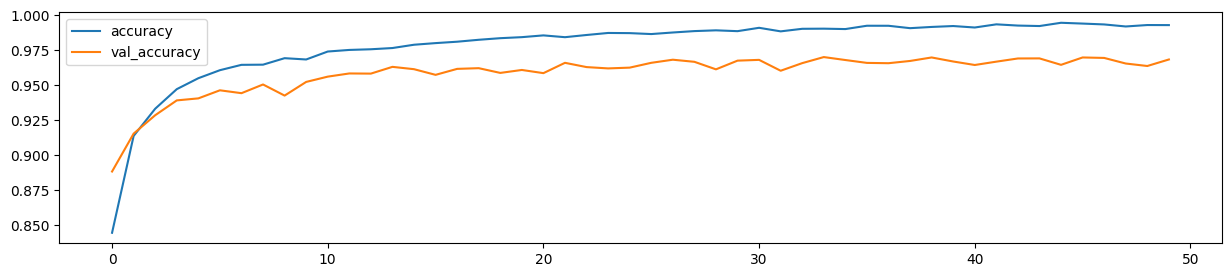

In [8]:
# acc, val_accuracy 선그래프 시각화
plt.figure(figsize = (15,3))
plt.plot(h.history['accuracy'], label = 'accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [9]:
# 예측
# X_test 0번째 이미지 1장만 예측시켜보기
# 학습 X_train 3차원(2차원 이미지 여러개)
# 예측 3차원처럼 표현해서 넣기
mlp_model.predict(X_test[[0]])
np.argmax(mlp_model.predict(X_test[0:1])) # 0만 포함
# 7번째 인덱스 예측 확률이 가장 높음 -> 예측 결과 : 7

1/1 [==============================] - 0s 22ms/step


7

In [10]:
# X_test 0번째의 실제 답
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
# 그림판 열어서 X
# 메모장, 스캐치캐드, 인터페이스를 제공하는 기술

In [12]:
!pip install gradio

In [13]:
!pip install typing-extensions --upgrade

In [17]:
# import gradio as gr
# # 숫자 인식하는 모델 함수 정의 & 스케치한 내용 입력크기에 맞게 전처리
# def sketch_reco(img):
#     # 그림판의 이미지 크기를 모델이 받아들일 수 있게 사이즈 조정
#     img = img.reshape(-1,28,28) # X_train 학습을 시켜서 , X_train2 학습된 모델이면 (-1,784)
#     pred = mlp_model.predict(img)
#     result = np.argmax(pred) # 최댓값이 든 인덱스 번호 반환 => 예측된 클래스값
#     return f'{result}'

# gr.Interface(fn = sketch_reco,inputs = gr.Sketchpad(brush_redius = 0.5), outputs = 'label').launch(share=True)